########################################################################
# Portfolio Optmation USING K-MEANS ALGORITHM AND OPTIMIZED WITH SHARP RATIO And plotting Efficient Frontier
########################################################################

<a id='1'></a>
# 1. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [22]:
%pip install gurobipy yfinance
!pip3 install KMeans
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import yfinance as yf
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize
import seaborn as sns

<a id='1.2'></a>
## 2. Loading the Data

## 2.1. Descriptive Statistics

In [23]:

# Define a list of 30 random stock symbols
stock_symbols = ["TSLA", "GM", "F", "TM", "HMC", "RACE", "TTWO", "EA", "META",
           "SNAP", "GOOGL", "PINS", "SHOP", "AMZN", "BABA", "EBAY", "ETSY", "MELI",
           "CVNA", "RBLX", "SPOT", "UBER", "LYFT", "WMT", "AMAT", "BIDU", "JD",
           "NFLX", "DIS", "CMCSA", "TCEHY", "PDD", "BZUN", "SE", "DOYU", "MTCH"]

# Fetch historical data for the stocks
data = yf.download(stock_symbols, start='2021-10-24', end='2023-10-24')



[*********************100%%**********************]  36 of 36 completed


In [24]:
# describe data
data.describe()

Adj Close                                                              \
             AMAT        AMZN        BABA        BIDU        BZUN       CMCSA   
count  502.000000  502.000000  502.000000  502.000000  502.000000  502.000000   
mean   120.211031  126.533315   99.132609  135.111414    7.597888   40.351764   
std     20.942461   25.473080   20.142964   18.314485    3.783119    5.429012   
min     73.705597   81.820000   63.150002   76.570000    2.730000   27.861525   
25%    105.170261  104.470003   86.069998  124.912502    4.450000   36.602176   
50%    117.750538  125.970001   93.435001  137.780006    6.665000   40.039038   
75%    138.574421  142.624756  109.682501  148.060005    9.625000   44.942630   
max    164.298447  184.802994  176.169998  175.470001   19.160000   51.266052   

                                                       ...        Volume  \
             CVNA         DIS        DOYU          EA  ...            SE   
count  502.000000  502.000000  502.000000  502.000000  ...  5.020000e+02   
mean    65.160259  109.791833    1.524245  125.653230  ...  6.609107e+06   
std     80.676350   24.269436    0.623164    6.688541  ...  5.248016e+06   
min      3.720000   79.320000    0.870000  108.854515  ...  1.369100e+06   
25%     11.812500   92.344997    1.080000  121.598768  ...  3.981525e+06   
50%     31.585000  100.484997    1.250000  125.547192  ...  5.269150e+06   
75%     78.529999  122.774998    1.780000  129.427441  ...  7.397375e+06   
max    303.179993  176.869995    3.960000  143.735870  ...  5.227800e+07   

                                                                             \
               SHOP          SNAP          SPOT         TCEHY            TM   
count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02   
mean   2.310549e+07  3.531464e+07  1.920278e+06  3.935398e+06  2.635584e+05   
std    1.560757e+07  3.319790e+07  1.371785e+06  2.230139e+06  1.186522e+05   
min    4.713000e+06  7.693700e+06  5.503000e+05  9.251000e+05  9.560000e+04   
25%    1.214435e+07  2.034038e+07  1.233725e+06  2.546550e+06  1.890500e+05   
50%    1.921510e+07  2.609215e+07  1.594600e+06  3.433250e+06  2.332000e+05   
75%    2.981785e+07  3.757885e+07  2.121550e+06  4.683275e+06  3.033500e+05   
max    1.136080e+08  3.309939e+08  1.460990e+07  1.738540e+07  1.057300e+06   

                                                               
               TSLA          TTWO          UBER           WMT  
count  5.020000e+02  5.020000e+02  5.020000e+02  5.020000e+02  
mean   1.088778e+08  1.928232e+06  2.677902e+07  7.237840e+06  
std    4.287446e+07  1.647163e+06  1.432451e+07  4.149289e+06  
min    3.504270e+07  4.536000e+05  5.200400e+06  2.882500e+06  
25%    7.619678e+07  1.204225e+06  1.793035e+07  4.939800e+06  
50%    9.951000e+07  1.509800e+06  2.322355e+07  6.257850e+06  
75%    1.322047e+08  2.056975e+06  3.087320e+07  8.119925e+06  
max    3.065906e+08  1.970070e+07  1.156018e+08  4.431340e+07  

[8 rows x 216 columns]

# Calculating returns and volitalities


        Returns  Variance
AMAT   0.100573  0.441657
AMZN  -0.047204  0.422988
BABA  -0.207983  0.622870
BIDU  -0.066299  0.615610
BZUN  -0.649943  0.815099
CMCSA -0.052147  0.268931
CVNA   0.012063  1.527123
DIS   -0.313248  0.322402
DOYU  -0.318987  0.900828
EA    -0.023886  0.243227
EBAY  -0.273745  0.336531
ETSY  -0.480692  0.645835
F     -0.013236  0.430419
GM    -0.258285  0.395307
GOOGL  0.055142  0.342936
HMC    0.080603  0.249732
JD    -0.396616  0.640945
LYFT  -0.473436  0.771120
MELI   0.065001  0.629363
META   0.126809  0.540467
MTCH  -0.644625  0.524907
NFLX  -0.083087  0.564074
PDD    0.389058  0.884677
PINS  -0.120190  0.636393
RACE   0.185388  0.288175
RBLX  -0.117196  0.885532
SE    -0.697652  0.823008
SHOP  -0.214164  0.781289
SNAP  -0.442030  0.915901
SPOT  -0.105484  0.548991
TCEHY -0.125594  0.518761
TM     0.035935  0.250798
TSLA  -0.043656  0.625184
TTWO  -0.056788  0.374054
UBER   0.112930  0.538389
WMT    0.074391  0.214726


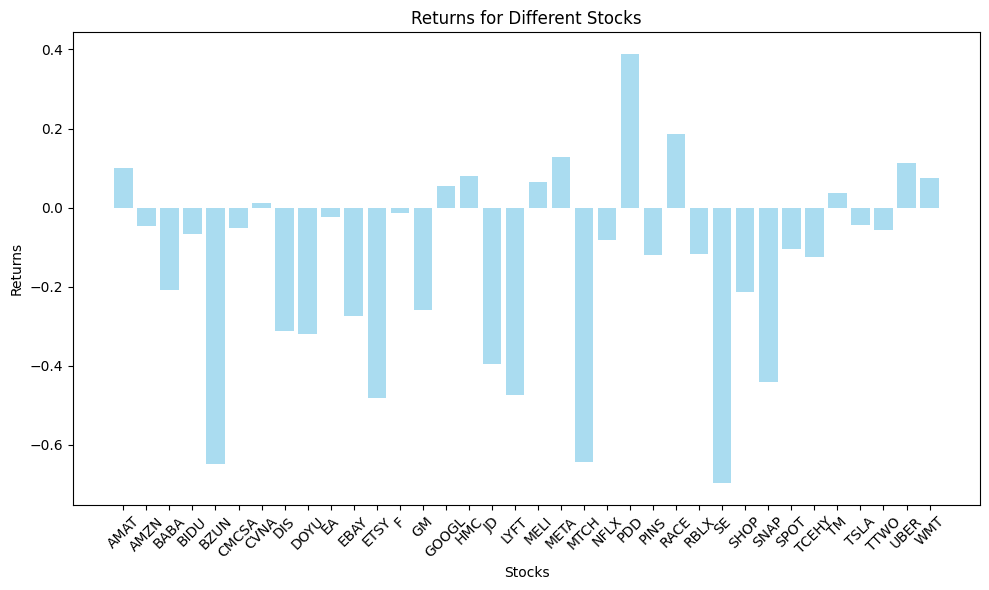

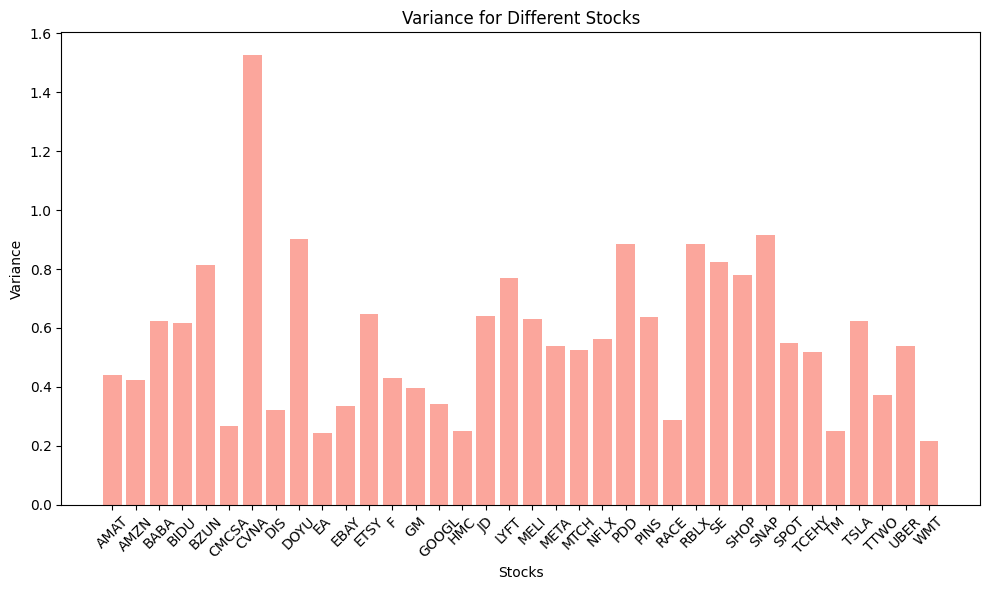

In [27]:
# Get the closing prices
closing_prices = data['Adj Close']

# Calculate daily returns
returns = closing_prices.pct_change().mean()*252


# Calculate variance
variance = closing_prices.pct_change().std() * np.sqrt(252)
ret_var = pd.concat([returns, variance], axis=1)
ret_var.columns = ['Returns', 'Variance']
print(ret_var)

plt.figure(figsize=(10, 6))
plt.bar(ret_var.index, ret_var['Returns'], color='skyblue', alpha=0.7)
plt.xlabel('Stocks')
plt.ylabel('Returns')
plt.title('Returns for Different Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot bar graph for Variance
plt.figure(figsize=(10, 6))
plt.bar(ret_var.index, ret_var['Variance'], color='salmon', alpha=0.7)
plt.xlabel('Stocks')
plt.ylabel('Variance')
plt.title('Variance for Different Stocks')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# K-Means Clustering

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

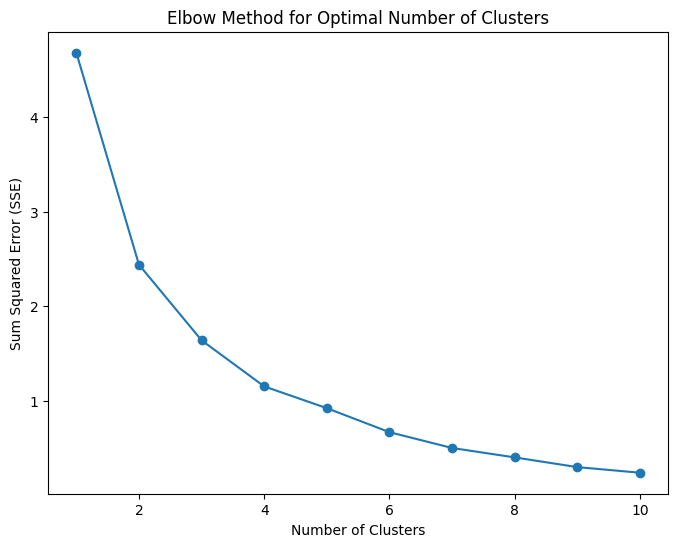

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


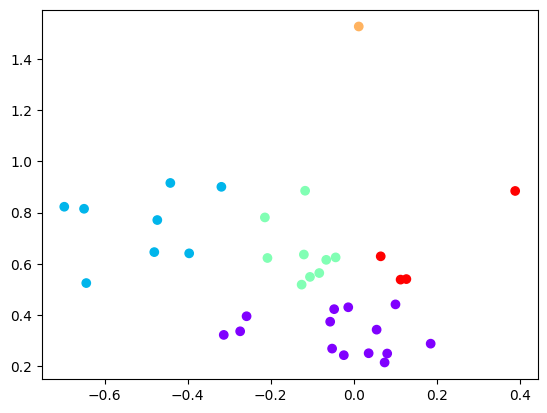

In [ ]:

X = ret_var.values


sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()


# Outilers

In [ ]:
print(kmeans.labels_)
print(returns)

[0 0 2 2 1 0 3 0 1 0 0 1 0 0 0 0 1 1 4 4 1 2 4 2 0 2 1 2 1 2 2 0 2 0 4 0]
AMAT     0.100573
AMZN    -0.047204
BABA    -0.207983
BIDU    -0.066299
BZUN    -0.649943
CMCSA   -0.052147
CVNA     0.012063
DIS     -0.313248
DOYU    -0.318987
EA      -0.023886
EBAY    -0.273745
ETSY    -0.480692
F       -0.013236
GM      -0.258285
GOOGL    0.055142
HMC      0.080603
JD      -0.396616
LYFT    -0.473436
MELI     0.065001
META     0.126809
MTCH    -0.644625
NFLX    -0.083087
PDD      0.389058
PINS    -0.120190
RACE     0.185388
RBLX    -0.117196
SE      -0.697652
SHOP    -0.214164
SNAP    -0.442030
SPOT    -0.105484
TCEHY   -0.125594
TM       0.035935
TSLA    -0.043656
TTWO    -0.056788
UBER     0.112930
WMT      0.074391
dtype: float64


In [ ]:

#removing the outliers
print(returns.idxmax())
ret_var.drop("CVNA", inplace =True)
ret_var.drop("PDD", inplace =True)


PDD


# Clustering Again

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

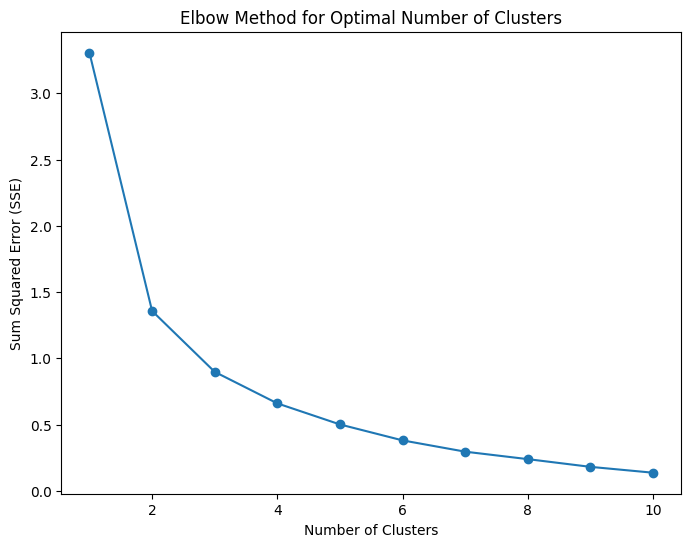

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


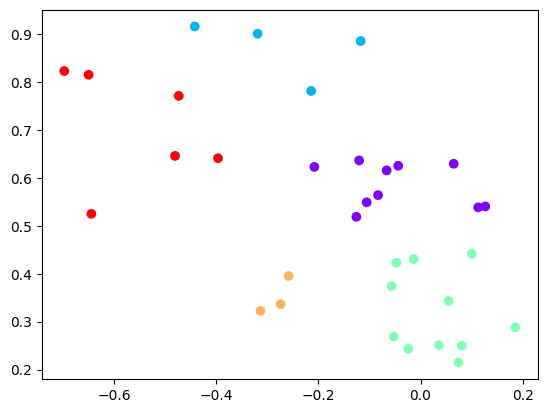

In [ ]:
X = ret_var.values


sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum Squared Error (SSE)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()


#Dataframe Representation

In [ ]:
Company = pd.DataFrame(ret_var.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df = pd.concat([Company, cluster_labels],axis = 1)
df.columns=["name","cluster"]
df

,name,cluster
0,AMAT,2
1,AMZN,2
2,BABA,0
3,BIDU,0
4,BZUN,4
5,CMCSA,2
6,DIS,3
7,DOYU,1
8,EA,2
9,EBAY,3


from matplotlib import pyplot as plt
df['cluster'].plot(kind='hist', bins=20, title='cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['cluster'].plot(kind='line', figsize=(8, 4), title='cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

# Portfolio optimisation and Efficient Frontier

In [2]:
# Function to calculate portfolio statistics
def portfolio_performance(weights, mean_returns, cov_matrix):
    portfolio_return = np.sum(mean_returns * weights)
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_std_dev

In [3]:
# Function to calculate Sharpe ratio
def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_return, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    sharpe = (p_return - risk_free_rate) / p_std_dev
    return -sharpe  # Negative Sharpe ratio as we'll minimize

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_performance(weights, mean_returns, cov_matrix)[1]

def quadratic_utility(weights, mean_returns, cov_matrix, risk_aversion):
    p_return, p_std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_return - 0.5 * risk_aversion * p_std_dev ** 2)  # Negative utility as we'll maximize

    # Function to calculate investor's utility
def utility_function(weights, mean_returns, cov_matrix, risk_aversion, target_return):
    p_return, _ = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(p_return - 0.5 * risk_aversion * p_return ** 2)  # Negative utility as we'll maximize

In [4]:
# Download historical stock data
tickers_1 = ["TSLA", "GM", "F", "TM", "HMC", "RACE", "TTWO", "EA", "META",
           "SNAP", "GOOGL", "PINS", "SHOP", "AMZN", "BABA", "EBAY", "ETSY", "MELI",
           "CVNA", "RBLX", "SPOT", "UBER", "LYFT", "WMT", "AMAT", "BIDU", "JD",
           "NFLX", "DIS", "CMCSA", "TCEHY", "PDD", "BZUN", "SE", "DOYU", "MTCH"]
start_date_1 = '2021-01-01'
end_date_1 = '2022-01-01'
data = yf.download(tickers_1, start=start_date_1, end=end_date_1)['Adj Close']
returns_1 = data.pct_change().dropna()

[*********************100%%**********************]  36 of 36 completed


In [5]:
# Calculate mean returns and covariance matrix
mean_returns = returns_1.mean()
cov_matrix = returns_1.cov()

# Set risk-free rate (e.g., 1-year US Treasury yield)
risk_free_rate = 0.015

# Set risk aversion parameter (maximum quadratic utility, utilityefficient_return)
risk_aversion = 2.0

# Set target return for the investor( utilityefficient_return)
target_return = 0.2  # Change this to the desired target return

In [7]:
# Initial weights for optimization
num_assets = len(tickers_1)
initial_weights = np.array([1 / num_assets] * num_assets)
# Define optimization constraints (weights sum up to 1)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Define optimization bounds (each weight between 0 and 1)
bounds = tuple((0, 1) for _ in range(num_assets))


In [8]:
# Find portfolio with maximum Sharpe ratio
optimal_sharpe = minimize(sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix, risk_free_rate),
                          method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_1 = optimal_sharpe['x']
print(optimal_weights_1)

In [9]:
optimal_volatility = minimize(portfolio_volatility, initial_weights, args=(mean_returns, cov_matrix),
                              method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_2 = optimal_volatility['x']
print(optimal_weights_2)

In [10]:
# Find portfolio with maximum quadratic utility
optimal_utility = minimize(quadratic_utility, initial_weights, args=(mean_returns, cov_matrix, risk_aversion),
                           method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_3 = optimal_utility['x']
print(optimal_weights_3)

In [11]:
efficient_return = minimize(utility_function, initial_weights, args=(mean_returns, cov_matrix, risk_aversion, target_return),
                            method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights_4 = efficient_return['x']
print(optimal_weights_4)

In [12]:
port_returns = []
port_std_devs = []
for i in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    ret, std_dev = portfolio_performance(weights, mean_returns, cov_matrix)
    port_returns.append(ret)
    port_std_devs.append(std_dev)

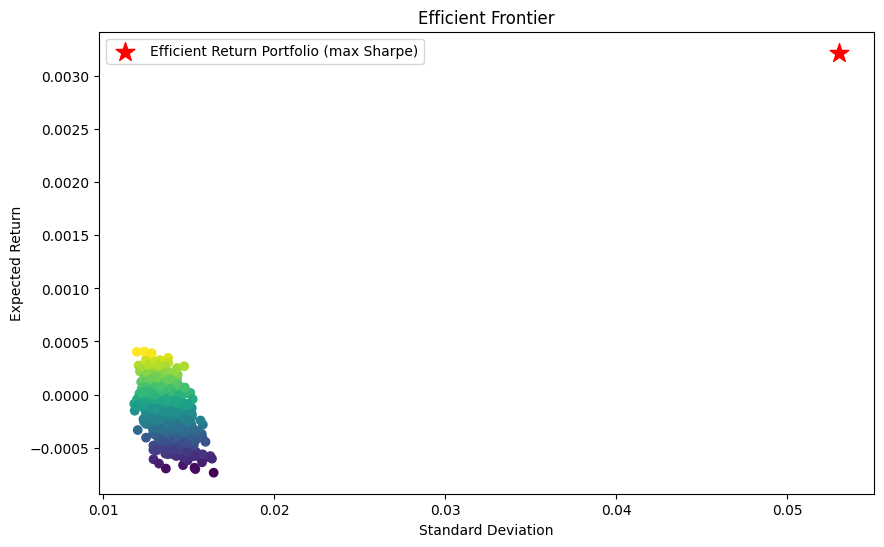

In [13]:
# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_std_devs, port_returns, c=(np.array(port_returns)), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

efficient_return_portfolio_return, efficient_return_portfolio_std_dev = portfolio_performance(
    optimal_weights_1, mean_returns, cov_matrix)
plt.scatter(efficient_return_portfolio_std_dev, efficient_return_portfolio_return,
            marker='*', color='r', s=200, label='Efficient Return Portfolio (max Sharpe)')

plt.legend()
plt.show()

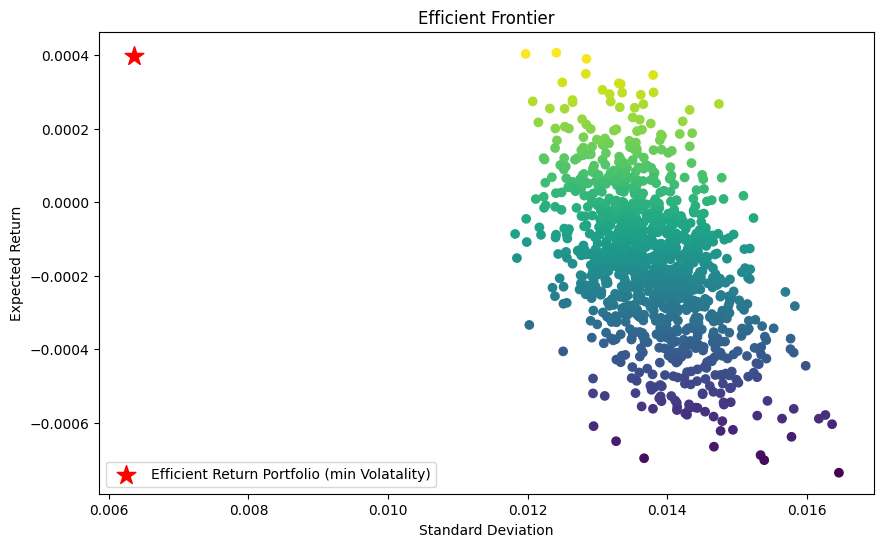

In [14]:
# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_std_devs, port_returns, c=(np.array(port_returns)), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

efficient_return_portfolio_return, efficient_return_portfolio_std_dev = portfolio_performance(
    optimal_weights_2, mean_returns, cov_matrix)
plt.scatter(efficient_return_portfolio_std_dev, efficient_return_portfolio_return,
            marker='*', color='r', s=200, label='Efficient Return Portfolio (min Volatality)')

plt.legend()
plt.show()

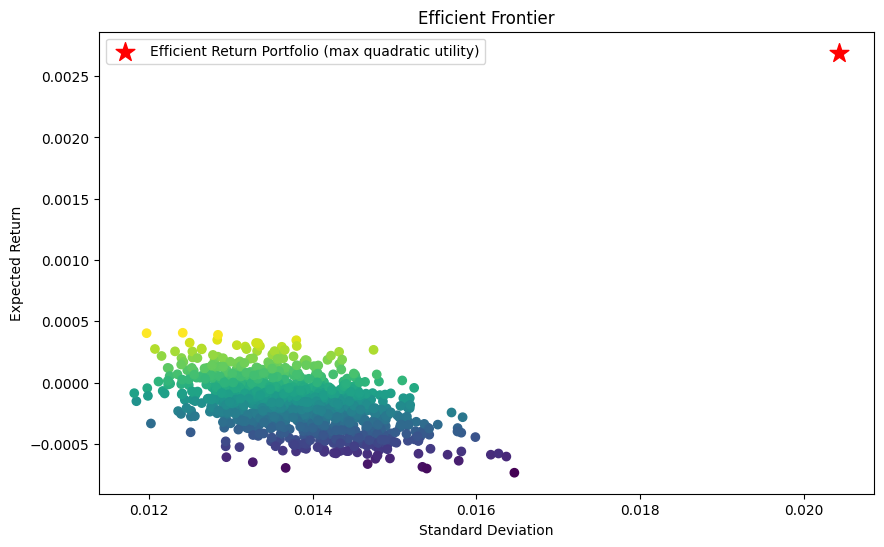

In [15]:
# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_std_devs, port_returns, c=(np.array(port_returns)), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

efficient_return_portfolio_return, efficient_return_portfolio_std_dev = portfolio_performance(
    optimal_weights_3, mean_returns, cov_matrix)
plt.scatter(efficient_return_portfolio_std_dev, efficient_return_portfolio_return,
            marker='*', color='r', s=200, label='Efficient Return Portfolio (max quadratic utility)')

plt.legend()
plt.show()

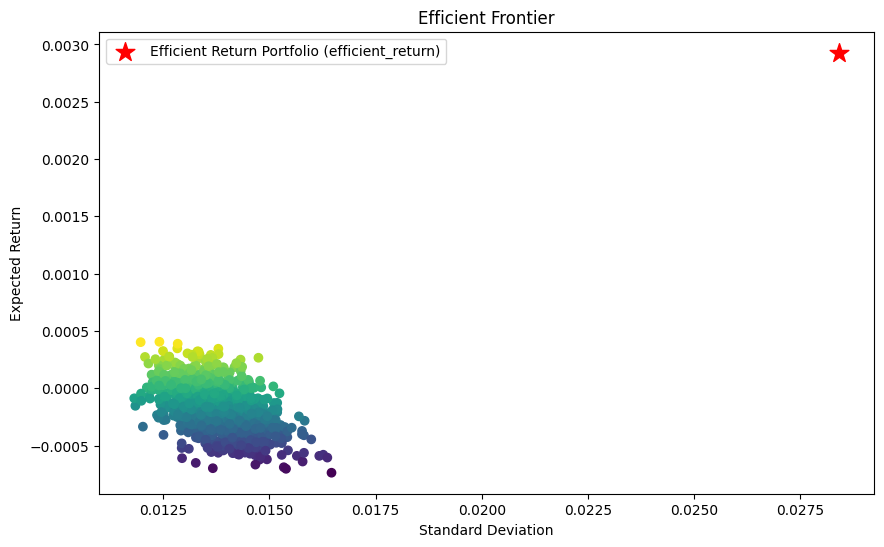

In [16]:
# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.scatter(port_std_devs, port_returns, c=(np.array(port_returns)), marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Standard Deviation')
plt.ylabel('Expected Return')

efficient_return_portfolio_return, efficient_return_portfolio_std_dev = portfolio_performance(
    optimal_weights_4, mean_returns, cov_matrix)
plt.scatter(efficient_return_portfolio_std_dev, efficient_return_portfolio_return,
            marker='*', color='r', s=200, label='Efficient Return Portfolio (efficient_return)')

plt.legend()
plt.show()

In [18]:
# Create a DataFrame to store weights along with their stock names
weights_data = pd.DataFrame({
    'Ticker': tickers_1,
    'Weights_Sharpe': optimal_weights_1,
    'Weights_Volatility': optimal_weights_2,
    'Weights_Utility': optimal_weights_3,
    'Weights_Efficient_return': optimal_weights_4
})
# Set the ticker column as the index
weights_data.set_index('Ticker', inplace=True)


print(weights_data)

        Weights_Sharpe  Weights_Volatility  Weights_Utility  \
Ticker                                                        
TSLA      0.000000e+00        5.475221e-18     5.034065e-02   
GM        0.000000e+00        7.994303e-02     0.000000e+00   
F         0.000000e+00        4.776366e-19     0.000000e+00   
TM        2.606836e-16        6.156988e-20     0.000000e+00   
HMC       0.000000e+00        0.000000e+00     0.000000e+00   
RACE      0.000000e+00        7.629229e-02     0.000000e+00   
TTWO      9.330825e-17        1.103979e-19     0.000000e+00   
EA        0.000000e+00        7.958026e-02     0.000000e+00   
META      1.007015e-17        0.000000e+00     0.000000e+00   
SNAP      1.020634e-16        4.007428e-02     0.000000e+00   
GOOGL     0.000000e+00        1.483004e-03     0.000000e+00   
PINS      0.000000e+00        1.313045e-18     0.000000e+00   
SHOP      4.322920e-17        0.000000e+00     3.358148e-01   
AMZN      2.297786e-17        6.555556e-18     0.000000